In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt
import statistics as stat
import csv
import talib

## 1.  資料匯入

In [2]:
tickers = ['EWA', 'EWZ', 'EWC', 'FXI', 'EWQ', 'EWG', 'EWH', 'EWI', 'EWJ', 'EWY',
           'EWN', 'EWS', 'EZA', 'EWP', 'EWD', 'EWL', 'EWT', 'EWU', 'IVV']

In [3]:
data = pd.read_csv("data_adjclose.csv", index_col=0 )
data.index = pd.to_datetime(data.index)
data.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-03,8.217886,14.126711,12.931461,13.237745,16.154015,13.303169,7.709301,31.728643,34.990158,23.648851,12.649429,7.995531,23.410761,19.021193,12.767601,12.915568,15.704612,20.224211,88.355942
2005-01-04,8.073186,13.520161,12.553794,12.872897,15.789632,13.037824,7.522993,31.005836,34.406452,23.001278,12.464212,7.859820,22.539045,18.658321,12.447660,12.509844,15.347388,19.853024,87.292419
2005-01-05,8.103125,13.402760,12.387615,12.580059,15.809880,13.044994,7.355958,31.167849,34.374020,23.157021,12.381896,8.006838,21.926809,18.555410,12.441620,12.509844,15.281234,19.864275,86.764305
2005-01-06,8.118093,13.285370,12.319633,12.594460,15.769397,13.052168,7.426626,31.142916,34.374020,22.771757,12.416193,8.153857,21.282505,18.642071,12.465767,12.524873,15.268003,19.853024,87.116364
2005-01-07,8.108113,13.467980,12.289425,12.481648,15.722158,12.966111,7.349532,30.818907,34.179440,22.706182,12.278999,8.040765,21.396206,18.241280,12.314852,12.284440,15.148928,19.875515,86.954994


In [4]:
returns = (data - data.shift(1)) / data.shift(1)
returns.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,-0.017608,-0.042936,-0.029205,-0.027561,-0.022557,-0.019946,-0.024167,-0.022781,-0.016682,-0.027383,-0.014642,-0.016973,-0.037236,-0.019077,-0.025059,-0.031414,-0.022746,-0.018354,-0.012037
2005-01-05,0.003708,-0.008683,-0.013237,-0.022748,0.001282,0.000550,-0.022203,0.005225,-0.000943,0.006771,-0.006604,0.018705,-0.027163,-0.005516,-0.000485,0.000000,-0.004310,0.000567,-0.006050
2005-01-06,0.001847,-0.008759,-0.005488,0.001145,-0.002561,0.000550,0.009607,-0.000800,0.000000,-0.016637,0.002770,0.018362,-0.029384,0.004670,0.001941,0.001201,-0.000866,-0.000566,0.004058
2005-01-07,-0.001229,0.013745,-0.002452,-0.008957,-0.002996,-0.006593,-0.010381,-0.010404,-0.005661,-0.002880,-0.011050,-0.013870,0.005342,-0.021499,-0.012106,-0.019196,-0.007799,0.001133,-0.001852


## 2. 兩種觀點下的long-short portfolio

### 技術指標1：KD值

In [5]:
from talib import abstract
print(abstract.STOCH)

STOCH([input_arrays], [fastk_period=5], [slowk_period=3], [slowk_matype=0], [slowd_period=3], [slowd_matype=0])

Stochastic (Momentum Indicators)

Inputs:
    prices: ['high', 'low', 'close']
Parameters:
    fastk_period: 5
    slowk_period: 3
    slowk_matype: 0
    slowd_period: 3
    slowd_matype: 0
Outputs:
    slowk
    slowd


In [6]:
high = pd.read_csv("high_all.csv", index_col=0 )
high.index = pd.to_datetime(high.index)

low = pd.read_csv("low_all.csv", index_col=0 )
low.index = pd.to_datetime(low.index)

close = pd.read_csv("data_close.csv", index_col=0 )
close.index = pd.to_datetime(close.index)

<b> (1) 計算KD值

In [7]:
def etf2pd(etf):
    etf_pd = pd.DataFrame(index=data.index)
    etf_pd["high"] = high[etf]
    etf_pd["low"] = low[etf]
    etf_pd["close"] = close[etf]
    return etf_pd

In [8]:
#K-D>0:買進；K-D<0:賣出
kd = pd.DataFrame()
for i in tickers:
    tmp_kd = abstract.STOCH(etf2pd(i), fastk_period=9, slowk_period=3,slowd_period=3).fillna(value=0).asfreq("BM")
    comp_kd = tmp_kd["slowk"] - tmp_kd["slowd"]   #series
    kd[i] = comp_kd
    
kd.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-31,-3.338964,-0.162854,4.506110,0.503149,0.893168,-1.930519,0.348465,9.273940,1.416509,-2.959619,4.241357,-0.042129,6.323115,13.200215,-0.793644,-3.950624,12.480977,2.546269,7.477616
2005-02-28,4.878163,-2.096977,0.076048,6.505569,5.543672,5.047259,6.766467,25.811234,13.823652,0.721753,-0.494303,-7.904937,-4.673174,6.864821,-1.799052,4.755436,19.232478,0.087080,19.084277
2005-03-31,2.398714,10.437846,11.434428,1.974395,4.517123,7.941814,10.893262,21.839255,-0.484985,4.586761,4.999536,2.778969,11.590073,1.940132,6.046458,4.122102,7.657972,3.289232,15.067370
2005-04-29,1.045494,-16.857158,-16.381040,2.165434,-2.706236,-0.461393,1.984389,-7.495883,6.743607,-12.590413,4.230564,7.642495,-12.758694,-1.795630,-16.295002,-7.810257,7.139965,-5.198736,3.016979
2005-05-31,-2.684381,-5.305669,0.174024,22.470760,-3.939048,-6.468877,20.025550,14.809972,8.490022,-4.846244,-17.899387,-8.532076,-4.076305,-15.869585,-13.296115,-7.056060,15.569346,-13.970762,-4.133408


In [9]:
#K值
k = pd.DataFrame()
for i in tickers:
    tmp_k = abstract.STOCH(etf2pd(i), fastk_period=9, slowk_period=3,slowd_period=3).fillna(value=0).asfreq("BM")["slowk"]
    k[i] = tmp_k

<b> (2) 定義函數：抓每個月KD前四和後四檔的ETF

In [10]:
def get_8_etf_kd(time):   #time: "y-m" ex."2005-1"   #output: 兩個list(long, short)
    temp_kd_set = kd[time]   #type: pd.dataframe
    temp_k_set = k[time]
    monthly_kd_set = []   #每個月的etf排名及其kd值
    for j in range(temp_kd_set.shape[1]):   #df行數
        if 20 < temp_k_set.iloc[0, j] < 80:
            etf_kd = [tickers[j], temp_kd_set.iloc[0, j]]
            monthly_kd_set.append(etf_kd)
    monthly_kd_set.sort(key=lambda x: x[1], reverse=True)
    #print(monthly_kd_set)
    #取出每月前四檔和後四檔etf名稱
    long_4_etf = [k[0] for k in monthly_kd_set[:4]]
    short_4_etf = [l[0] for l in monthly_kd_set[-4:]]
    return long_4_etf, short_4_etf

<b> (3) 使用函數跑每月的權重與最終整體報酬率（period: 2005-1~2012-12)

In [11]:
weight_kd = pd.DataFrame(columns=tickers,index=kd.index).fillna(value=0)

for y in range(2005, 2013):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        #print(time)
        tmp_etf = get_8_etf_kd(time)
        for a in tmp_etf[0]:
            weight_kd.loc[time, a] = 1
        for b in tmp_etf[1]:
            weight_kd.loc[time, b] = -1

weight_kd

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-31,0,0,0,0,0,-1,0,1,0,-1,0,0,1,0,-1,-1,1,0,1
2005-02-28,-1,0,-1,0,0,0,0,1,1,0,0,-1,0,0,0,0,1,-1,1
2005-03-31,0,0,1,0,-1,0,0,1,0,-1,-1,0,1,0,0,0,0,-1,1
2005-04-29,0,-1,-1,1,0,0,0,0,1,-1,0,0,-1,0,0,0,1,0,1
2005-05-31,0,0,0,1,0,0,1,1,0,0,-1,0,0,-1,-1,0,1,-1,0
2005-06-30,0,0,-1,0,1,1,-1,1,-1,0,0,0,0,1,0,0,0,-1,0
2005-07-29,-1,1,0,0,0,0,-1,0,1,0,1,-1,0,0,0,-1,0,0,0
2005-08-31,0,0,0,-1,1,0,0,0,-1,0,1,-1,0,0,1,0,-1,1,0
2005-09-30,0,0,-1,1,0,0,0,0,0,-1,1,0,0,0,0,1,1,-1,-1


In [12]:
q_kd = []    #q1~q95
tmp_weight_kd = weight_kd.shift(1) #把前個月的權重換成下個月index，使ret_次月和weight_這個月配在一起
for y in range(2005, 2013):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)   #這個月
        #print(time)
        if time != '2005-1':
            tmp_ret = returns[time].mean()    #series   #若沒有取mean,則為dataframe
            monthly_q_kd = float(tmp_weight_kd[time].dot(tmp_ret).to_numpy())
            q_kd.append(monthly_q_kd)
        else:
            pass
#print(q_kd)
print('KD mean:', stat.mean(q_kd))

KD mean: -0.0009691691831406634


<b/> ➤以KD作為投資組合選擇指標建構long-short portfolio，則平均報酬率為-0.0969%。

### 技術指標2：指數移動平均線 EMA

<b> (1) 計算每日20日(短線)與30日(長線)的EMA差值，取每月月底MA數值作為預測。

In [13]:
ma = pd.DataFrame()
for i in tickers:
    ma[i] = talib.EMA(data[i], timeperiod=20) - talib.EMA(data[i], timeperiod=35)
monthly_ma = ma.asfreq("BM")
monthly_ma

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-28,0.165789,0.710996,0.214852,0.262361,0.220052,0.107096,0.062265,0.257123,-0.015565,0.911264,0.262494,0.087266,0.442623,0.285084,0.077266,0.132683,0.287647,0.346943,0.509490
2005-03-31,0.024840,0.037608,0.107351,0.027806,0.077480,-0.002312,-0.005852,0.077411,-0.040513,0.172831,0.053499,0.000498,-0.158925,-0.012658,0.004822,0.017640,-0.076229,0.042247,-0.166971
2005-04-29,-0.054647,-0.103694,-0.089662,-0.036904,-0.087116,-0.115040,0.026100,-0.175466,-0.369404,-0.197246,-0.108030,-0.025036,-0.216620,-0.149013,-0.033454,-0.030672,-0.156466,-0.059400,-0.524676
2005-05-31,-0.025409,0.085923,-0.036388,-0.034329,-0.012839,-0.019787,0.027943,-0.176334,-0.229114,0.031243,-0.056347,0.020358,-0.166899,-0.049102,-0.012712,-0.020043,0.066212,-0.066361,0.325110
2005-06-30,0.092491,0.222084,0.177304,0.099398,0.004324,0.006350,0.061906,-0.105859,-0.044651,0.116890,0.036690,0.034388,-0.014548,-0.018774,-0.015875,-0.040058,0.160966,0.023612,0.352700
2005-07-29,0.070259,0.163163,0.233750,0.254892,0.167182,0.154876,0.136260,0.207494,0.009254,0.519665,0.092841,0.130835,0.388378,0.158084,0.114944,0.069833,0.116918,-0.002952,0.665717
2005-08-31,0.065930,0.294018,0.205716,0.169962,0.092404,0.115920,0.041533,0.123892,0.534507,0.190758,0.025822,0.022365,0.399052,0.096852,0.073019,0.081027,-0.121675,0.121494,0.017191
2005-09-30,0.124151,0.840771,0.287342,0.086164,0.070267,0.050095,0.044960,0.177778,0.855569,0.668632,0.012497,0.005889,0.527855,0.190850,0.073385,0.079563,-0.193823,0.115822,0.053599


若為正數，即表示當日短均線超過長均線，為看漲的股票；反之則看跌。

<b> (2) 同上步驟，抓出每月long-short portfolio的資產分配權重，並試算出2005~2012年的整體報酬率。

In [14]:
def get_8_etf_ma(time):   #time: "y-m" ex."2005-1"   #output: 兩個list(long, short)
    temp_ma_set = monthly_ma[time]   #type: pd.dataframe
    monthly_ma_set = []   #每個月的etf排名及其ma值
    for j in range(temp_ma_set.shape[1]):   #df行數
        etf_ma = [tickers[j], temp_ma_set.iloc[0, j]]   #ix: label or index searching
        monthly_ma_set.append(etf_ma)
    monthly_ma_set.sort(key=lambda x: x[1], reverse=True)
    #print(monthly_ma_set)
    #取出每月前四檔和後四檔etf名稱
    long_4_etf = [k[0] for k in monthly_ma_set[:4]]
    short_4_etf = [l[0] for l in monthly_ma_set[-4:]]
    return long_4_etf, short_4_etf

In [16]:
weight_ma = pd.DataFrame(columns=tickers,index=pd.date_range('2005/1/1','2019/12/31', freq='BM')).fillna(value=0)

for y in range(2005, 2013):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        #print(time)
        tmp_etf = get_8_etf_ma(time)
        for a in tmp_etf[0]:
            weight_ma.loc[time, a] = 1
        for b in tmp_etf[1]:
            weight_ma.loc[time, b] = -1

weight_ma.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2005-01-31,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1
2005-02-28,0,1,0,0,0,0,-1,0,-1,1,0,-1,1,0,-1,0,0,0,1
2005-03-31,0,0,1,0,1,0,0,1,-1,1,0,0,-1,0,0,0,-1,0,-1
2005-04-29,0,0,0,0,0,0,1,0,-1,-1,0,1,-1,0,1,1,0,0,-1
2005-05-31,0,1,0,0,0,0,0,-1,-1,1,0,0,-1,0,0,0,1,-1,1


In [18]:
q_ma = []    #q1~q95
tmp_weight_ma = weight_ma.shift(1)
for y in range(2005, 2013):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)   #這個月
        #print(time)
        if time != '2005-1':
            tmp_ret = returns[time].mean()    #series   #若沒有取mean,則為dataframe
            monthly_q_ma = float(tmp_weight_ma[time].dot(tmp_ret).to_numpy())
            q_ma.append(monthly_q_ma)
        else:
            pass

print('EMA mean:', stat.mean(q_ma))

EMA mean: -0.0006452242919739201


<b/> ➤以EMA作為投資組合選擇的指標，則平均報酬率為-0.0645%。

### 合併兩種view的估計資料

In [19]:
Q = np.array([
    [stat.mean(q_kd)],
    [stat.mean(q_ma)]
])
Q

array([[-0.00096917],
       [-0.00064522]])

In [20]:
#cov_mat = np.stack((q_rsi, q_ma), axis = 0)  
omega = np.cov(np.stack((q_kd, q_ma), axis = 0)  )
print(omega) 
print(type(omega))

[[ 3.25115313e-05 -4.13977397e-06]
 [-4.13977397e-06  4.46637684e-05]]
<class 'numpy.ndarray'>


## 3. 代入Blacklitterman Model (period2： 2013/1/1~2019/12/31)

<b> (1) 以KD與EMA作為技術指標，預測第二期的long-short portfolio權重

In [21]:
w_eq = np.array([
    [0.01797, 0.00554, 0.02888, 0.04935, 0.02994, 0.02390, 0.01081, 0.00598, 0.07510, 0.01466,
     0.01201, 0.00316, 0.00454, 0.00672, 0.00773, 0.03099, 0.01540, 0.04248, 0.61484]])
#每個月一個共變數矩陣sigma
tau = 0.05
delta = 3.37  #風險趨避係數
omega_inv = np.linalg.inv(omega)

In [22]:
for y in range(2013, 2020):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        #print(time)
        tmp_etf = get_8_etf_kd(time)
        for a in tmp_etf[0]:
            weight_kd.loc[time, a] = 1
        for b in tmp_etf[1]:
            weight_kd.loc[time, b] = -1

weight_kd.tail()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2019-08-30,0,1,0,-1,-1,-1,0,0,0,0,0,1,1,-1,0,0,1,0,0
2019-09-30,0,0,-1,0,0,0,0,1,-1,-1,0,0,0,1,0,1,0,1,-1
2019-10-31,-1,0,1,-1,0,0,1,0,0,0,1,0,-1,-1,1,0,0,0,0
2019-11-29,1,0,1,-1,0,0,-1,0,-1,0,1,0,0,0,1,0,-1,0,0
2019-12-31,0,0,0,-1,0,0,1,-1,0,0,0,0,0,1,-1,0,1,1,-1


In [23]:
for y in range(2013, 2020):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        #print(time)
        tmp_etf = get_8_etf_ma(time)
        for a in tmp_etf[0]:
            weight_ma.loc[time, a] = 1
        for b in tmp_etf[1]:
            weight_ma.loc[time, b] = -1

weight_ma.tail()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2019-08-30,0,-1,1,0,0,0,0,0,0,-1,1,0,-1,0,0,1,1,0,-1
2019-09-30,0,-1,0,0,0,0,-1,0,1,1,0,-1,-1,0,0,0,1,0,1
2019-10-31,-1,0,-1,0,0,0,-1,0,1,1,0,-1,0,0,0,0,1,0,1
2019-11-29,-1,-1,0,0,0,0,-1,0,1,1,0,0,0,-1,0,0,1,0,1
2019-12-31,-1,1,-1,0,0,0,-1,0,0,1,0,-1,0,0,0,0,1,0,1


<b> (2) 代入Blacklitterman Model進行觀點調整，試算出每月最佳權重w*

In [25]:
# 每個月的P矩陣(技術指標權重)
def get_p_matrix(time):
    view1 = weight_kd[time].values.tolist()[0]
    view2 = weight_ma[time].values.tolist()[0]
    p = np.stack([view1, view2])   #matrix:2x19，type:ndarray
    return p  

In [26]:
def get_optimal_weight(time):
    P = get_p_matrix(time)
    sigma = returns[time].cov()
    A = omega/tau + (P.dot(sigma).dot(np.transpose(P))/(1+tau))
    A_inv = np.linalg.inv(A)   #反矩陣
    lmda = (omega_inv.dot(Q)*tau/delta) - A_inv.dot(P).dot((sigma/(1+tau))).dot(np.transpose(w_eq)) \
    - (A_inv.dot(P).dot((sigma/(1+tau))).dot(np.transpose(P)).dot(omega_inv).dot(Q))*(tau/delta)
    optimal_w = (1/(1+tau))*(w_eq + np.transpose(np.transpose(P).dot(lmda)))
    return optimal_w

In [27]:
w_bl = pd.DataFrame(columns=tickers,index=pd.date_range('2013/1/1','2019/12/31', freq='BM'))
for y in range(2013, 2020):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        opt_w = get_optimal_weight(time)
        w_bl[time] = opt_w

w_bl.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01-31,0.0171143,0.0293856,0.318278,-0.510437,0.0285143,0.0227619,0.0102952,0.296468,0.0715238,0.280626,0.0114381,-0.0210998,-0.0197856,0.0305094,0.0073619,0.0295143,-0.0094427,0.0404571,0.318898
2013-02-28,0.0705372,0.00527619,0.0275048,-0.0173493,0.0285143,0.0227619,-0.0431277,0.0481919,0.0824501,0.0139619,0.0648611,0.00300952,0.0468204,-0.00452632,0.0182882,0.0404406,0.0146667,-0.0129658,0.543065
2013-03-29,-0.144596,-0.156434,-0.134205,-0.11471,0.0285143,0.0227619,0.0102952,0.00569524,0.0715238,0.0139619,0.0114381,0.00300952,0.00432381,0.0064,0.0073619,0.191224,0.176376,0.202167,0.747272
2013-04-30,0.0171143,0.227925,0.0100602,0.0295554,0.0285143,0.0227619,0.0102952,0.00569524,0.0889684,-0.00348267,0.0114381,0.0204541,-0.0131208,0.0064,0.0073619,0.0469589,0.0146667,0.0404571,0.603006
2013-05-31,0.208807,0.196969,0.392265,0.238693,0.201581,-0.341998,0.0102952,-0.550758,-0.120169,-0.350798,0.376198,0.00300952,0.196017,-0.35836,0.0073619,0.0295143,0.0146667,0.0404571,0.758629


## 4. 模型績效比較

<b> (1) 投資組合報酬率比較

個別ETF報酬率比較：BL Model v.s. Equilibrium

In [28]:
returns_bl = pd.DataFrame(columns=tickers,index=pd.date_range('2013/1/1','2019/12/31', freq='BM'))
for y in range(2013, 2020):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        r = np.array(returns[time].mean().values)
        w = w_bl[time].values
        tmp_ret_bl = r * w
        returns_bl[time] = tmp_ret_bl
        
returns_bl.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01-31,3.14832e-05,2.14487e-05,0.000254533,-0.000635057,4.29364e-05,4.44255e-05,2.17956e-05,0.000788808,7.99243e-05,-0.000806141,3.18731e-05,-6.303e-06,7.174e-05,5.57428e-05,2.12184e-05,9.71258e-05,6.98835e-06,5.68544e-05,0.00076367
2013-02-28,0.000110422,-7.94195e-06,-3.24472e-05,5.5977e-05,-4.8254e-05,-4.71288e-05,1.77713e-05,-0.000321499,0.000106924,2.64119e-05,-0.00023329,-1.19638e-06,-6.29113e-05,1.01536e-05,1.07046e-05,6.09936e-06,7.21137e-06,1.82107e-05,0.000402532
2013-03-29,-4.80763e-05,8.57524e-05,-7.08265e-05,0.000296564,-1.40453e-05,-8.17117e-06,-6.8974e-06,-1.43367e-05,0.000202733,-2.5517e-05,1.00224e-05,3.3211e-06,-1.79479e-06,-1.67994e-05,2.23197e-06,0.000205187,-0.000112712,0.000172234,0.00135822
2013-04-30,3.14652e-05,0.000149053,-6.98117e-06,3.20483e-05,7.44986e-05,4.34398e-05,1.49393e-05,2.89136e-05,0.000333327,2.32851e-06,1.80867e-05,3.20563e-05,-5.54825e-06,2.91256e-05,7.17529e-06,8.39577e-05,3.32606e-05,5.31894e-05,0.000555832
2013-05-31,-0.00131858,-0.000706981,-0.000175486,-0.000493671,0.000182365,-0.000421833,-1.72944e-05,-0.000342983,0.000404858,0.000198156,0.000455638,-8.79574e-06,-0.000748411,0.000496483,-3.7373e-06,-3.33326e-05,-1.68027e-05,-1.13398e-06,0.000834156


In [30]:
returns_eq = pd.DataFrame(columns=tickers,index=pd.date_range('2013/1/1','2019/12/31', freq='BM'))
for y in range(2013, 2020):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        r = np.array(returns[time].mean().values)
        w = w_eq
        tmp_ret_eq = r * w
        returns_eq[time] = tmp_ret_eq

returns_eq.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01-31,3.30574e-05,4.04367e-06,2.30959e-05,6.13985e-05,4.50832e-05,4.66468e-05,2.28854e-05,1.59109e-05,8.39205e-05,-4.21131e-05,3.34668e-05,9.43963e-07,-1.64615e-05,1.22779e-05,2.22793e-05,0.000101982,-1.13972e-05,5.96971e-05,0.00147237
2013-02-28,2.8131e-05,-8.33904e-06,-3.40696e-05,-0.000159227,-5.06667e-05,-4.94853e-05,-4.4544e-06,-3.98939e-05,9.73919e-05,2.77325e-05,-4.31972e-05,-1.2562e-06,-6.10027e-06,-1.50745e-05,4.52457e-06,4.67399e-06,7.57194e-06,-5.96638e-05,0.000455733
2013-03-29,5.97481e-06,-3.03687e-06,1.52414e-05,-0.000127587,-1.47476e-05,-8.57973e-06,-7.24227e-06,-1.50535e-05,0.00021287,-2.67928e-05,1.05236e-05,3.48715e-06,-1.88453e-06,-1.76393e-05,2.34357e-06,3.32529e-05,-9.84123e-06,3.61904e-05,0.00111752
2013-04-30,3.30385e-05,3.62291e-06,-2.0041e-05,5.35125e-05,7.82235e-05,4.56118e-05,1.56862e-05,3.03593e-05,0.000281368,-9.80167e-06,1.89911e-05,4.95244e-06,1.91979e-06,3.05819e-05,7.53405e-06,5.5407e-05,3.49236e-05,5.58489e-05,0.00056674
2013-05-31,-0.000113477,-1.98847e-05,-1.29199e-05,-0.000102067,2.70859e-05,2.94792e-05,-1.81591e-05,3.72403e-06,-0.000253017,-8.28101e-06,1.45461e-05,-9.23553e-06,-1.73342e-05,-9.3101e-06,-3.92417e-06,-3.49992e-05,-1.76428e-05,-1.19068e-06,0.000676052


兩投資組合每月報酬率比較

In [31]:
port_ret_bl = returns_bl.sum(axis=1)   #列加總
port_ret_eq = returns_eq.sum(axis=1)

comparison_ret = pd.DataFrame(columns=["Equilibrium", "BL Model", "Outperform"], index=pd.period_range('2013/1',freq='M', periods=84))
for y in range(2013, 2020):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        comparison_ret.ix[time, 0] = port_ret_eq[time].values[0]   #type: ndarray
        comparison_ret.ix[time, 1] = port_ret_bl[time].values[0]
        if port_ret_eq[time].values[0] < port_ret_bl[time].values[0]:
            comparison_ret.ix[time, 2] = "Yes"
        else:
            comparison_ret.ix[time, 2] = "No"

comparison_ret.head()

/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
/Users/daphne/anaconda3/lib/python3.7/si

,Equilibrium,BL Model,Outperform
2013-01,0.00196908,0.000943066,No
2013-02,0.000154332,1.77493e-05,No
2013-03,0.001205,0.00201709,Yes
2013-04,0.00128848,0.00151017,Yes
2013-05,0.000129444,-0.00171739,No


In [32]:
comparison_ret["Outperform"].value_counts()

No     68
Yes    16
Name: Outperform, dtype: int64

兩投資組合第二段期間的報酬率比較

In [33]:
print("Equilibrium return:",comparison_ret["Equilibrium"].mean())
print("BL Model return:", comparison_ret["BL Model"].mean())

Equilibrium return: 0.00046338389865590836
BL Model return: -0.0006035872825268404


<b> (2) 投資組合波動率比較

投資組合波動率公式：var(p) = wa^2 * var(a) + wb^2 * var(b) + 2 * wa * wb * cov(a,b)
<br>matrix method： var(p) = w(1,19) * var-cov matrix(19,19) * w'(19,1)

In [34]:
volatility = pd.DataFrame(columns=tickers, index=pd.period_range('2013/1',freq='M', periods=84))
for y in range(2013, 2020):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        volatility[time] = returns[time].std().values[np.newaxis, :]   #增加dim from (19,)to (1,19)
        
volatility.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01,0.00596741,0.00771695,0.00612126,0.0110463,0.00845207,0.0093556,0.00768471,0.0124432,0.0106961,0.0105414,0.00813166,0.00668264,0.0111309,0.0129182,0.00821798,0.00708203,0.00859854,0.00614207,0.00599569
2013-02,0.0107598,0.00874238,0.00617933,0.0118932,0.020462,0.0145069,0.0080517,0.0235721,0.00966496,0.0102102,0.0150941,0.0071847,0.0116611,0.0255404,0.0163366,0.00926902,0.00684797,0.00903557,0.00822785
2013-03,0.00866959,0.00971951,0.00587527,0.0124783,0.0116018,0.0100319,0.00801381,0.0158436,0.00674413,0.00880123,0.00954407,0.00593137,0.0132733,0.015857,0.00928173,0.00918291,0.00806242,0.0070888,0.00465968
2013-04,0.0136241,0.0142923,0.0139389,0.0143062,0.0140983,0.0133919,0.0103721,0.0171615,0.01459,0.0151963,0.0112462,0.00786292,0.0190043,0.0159492,0.0134885,0.0106707,0.0121694,0.00893401,0.00883745
2013-05,0.0114967,0.0109612,0.00728689,0.0114165,0.00932888,0.00859073,0.00905215,0.0123317,0.0140395,0.0097833,0.00795478,0.00814947,0.0112326,0.0116169,0.00957737,0.00821504,0.00890038,0.0065256,0.0066557


In [35]:
#cov(assets) = sigma
comparison_vol = pd.DataFrame(columns=["Equilibrium", "BL Model", "Outperform"], index=pd.period_range('2013/1',freq='M', periods=84))
for y in range(2013, 2020):
    for m in range(1,13):
        time = str(y)+'-'+str(m)
        sigma = returns[time].cov()
        # variance
        tmp_bl = np.array(w_bl[time].values.dot(sigma).dot(np.transpose(w_bl[time])), dtype=np.float64)  #.values shape: (1,19) #outcome: (1,1)
        tmp_eq = w_eq.dot(sigma).dot(np.transpose(w_eq))
        # std
        comparison_vol.ix[time, 0] = np.sqrt(tmp_eq)[0][0]
        comparison_vol.ix[time, 1] = np.sqrt(tmp_bl)[0][0]  #float64才能使用sqrt
        if tmp_bl < tmp_eq:
            comparison_vol.ix[time, 2] = "Yes"
        else:
            comparison_vol.ix[time, 2] = "No"

comparison_vol.head()

/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.

,Equilibrium,BL Model,Outperform
2013-01,0.0060346,0.00717552,No
2013-02,0.00834345,0.00908853,No
2013-03,0.0051432,0.00604883,No
2013-04,0.00924647,0.0110191,No
2013-05,0.00698819,0.00761822,No


In [36]:
comparison_vol["Outperform"].value_counts()

No     74
Yes    10
Name: Outperform, dtype: int64

In [37]:
print("Equilitbrium Total Return:", comparison_vol["Equilibrium"].mean())
print("BL Model Total Return:", comparison_vol["BL Model"].mean())

Equilitbrium Total Return: 0.007427373147973562
BL Model Total Return: 0.009152923622290284


<b> (3) 投資組合Sharpe ratio比較

Sharpe = returns / volatility  (monthly calculated)

In [38]:
comparison_sharpe = pd.DataFrame(columns=["Equilibrium", "BL Model", "Outperform"], index=pd.period_range('2013/1',freq='M', periods=84))
for y in range(2013, 2020):
    for m in range(1,13):
        time = str(y)+'-'+str(m)
        tmp_eq = comparison_ret.ix[time,0] / comparison_vol.ix[time,0]
        tmp_bl = comparison_ret.ix[time,1] / comparison_vol.ix[time,1]
        comparison_sharpe.ix[time, 0] = tmp_eq
        comparison_sharpe.ix[time, 1] = tmp_bl
        if tmp_bl > tmp_eq:
            comparison_sharpe.ix[time, 2] = "Yes"
        else:
            comparison_sharpe.ix[time, 2] = "No"
        
comparison_sharpe

/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launche

,Equilibrium,BL Model,Outperform
2013-01,0.326299,0.131428,No
2013-02,0.0184973,0.00195293,No
2013-03,0.234289,0.333468,Yes
2013-04,0.139348,0.137051,No
2013-05,0.0185232,-0.225431,No
2013-06,-0.0849722,-0.310997,No
2013-07,0.401166,0.147188,No
2013-08,-0.149409,-0.242372,No
2013-09,0.34941,0.298242,No
2013-10,0.238953,0.0227119,No


In [39]:
comparison_sharpe["Outperform"].value_counts()

No     73
Yes    11
Name: Outperform, dtype: int64

## 〈結論〉

綜合以上從月報酬率、標準差、Sharpe ratio的比較，可以看出Blacklitterman Model下調整的權重大約有5%的機會打敗Equilibrium portfolio。

<b> 日報酬率 (僅列舉部分ETF)

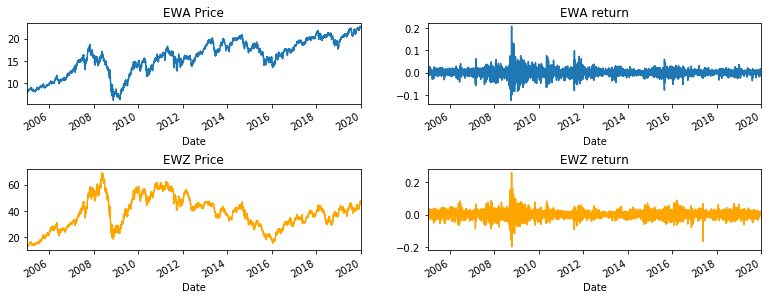

In [40]:
#開始畫圖
plt.subplots_adjust(top=1.5, bottom=0, left=0.3, right=2, hspace=0.8, wspace=0.2)
plt.subplot(3,2,1)   #2：共兩列，2：共兩行，1：目前在第一格子圖
plt.title("EWA Price")
data[tickers[0]].plot()
plt.subplot(3,2,2)
plt.title("EWA return")
returns[tickers[0]].plot()
# color="m"
plt.subplot(3,2,3)   #2：共兩列，2：共兩行，1：目前在第一格子圖
plt.title("EWZ Price")
data[tickers[1]].plot(color="orange")
plt.subplot(3,2,4)
plt.title("EWZ return")
returns[tickers[1]].plot(color="orange")


<b> Portfolio Return比較

Text(0.5, 1.0, 'Comparison of Portfolio Return')

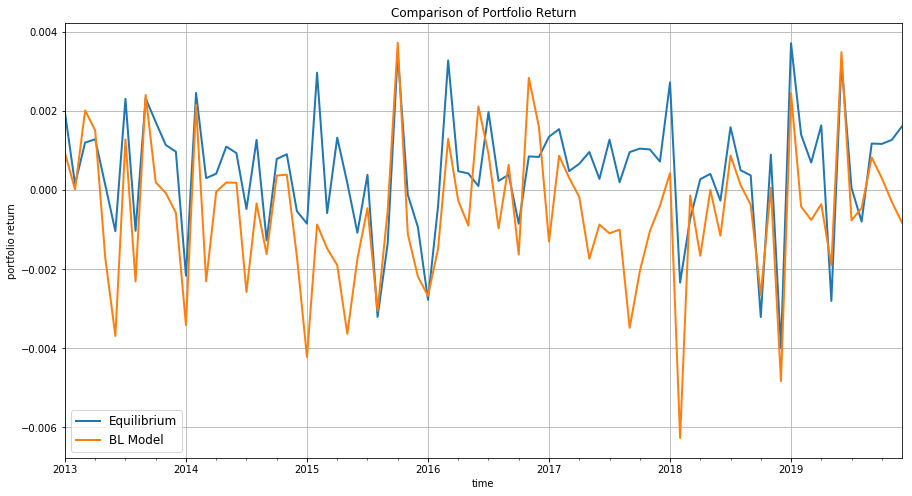

In [83]:
plt.figure(figsize=(15,8))

comparison_ret["Equilibrium"].plot(linewidth=2)
comparison_ret["BL Model"].plot(linewidth=2)

plt.grid(True)
plt.legend(loc='lower left', fontsize=12)
plt.xlabel('time')
plt.ylabel('portfolio return')
plt.title('Comparison of Portfolio Return')

<b> Portfolio Volatility 比較

Text(0.5, 1.0, 'Comparison of Portfolio Volatility')

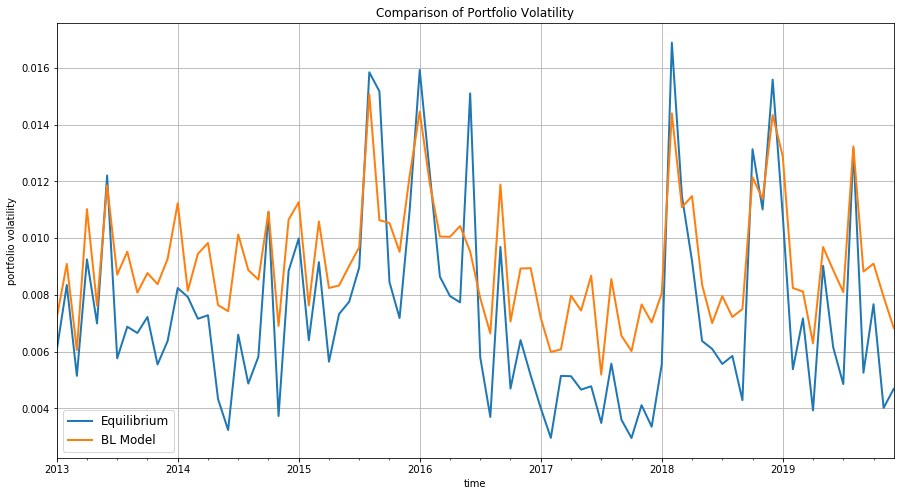

In [41]:
plt.figure(figsize=(15,8))

comparison_vol["Equilibrium"].plot(linewidth=2)
comparison_vol["BL Model"].plot(linewidth=2)

plt.grid(True)
plt.legend(loc='lower left', fontsize=12)
plt.xlabel('time')
plt.ylabel('portfolio volatility')
plt.title('Comparison of Portfolio Volatility')

Text(0.5, 1.0, 'Comparison of Portfolio Performance')

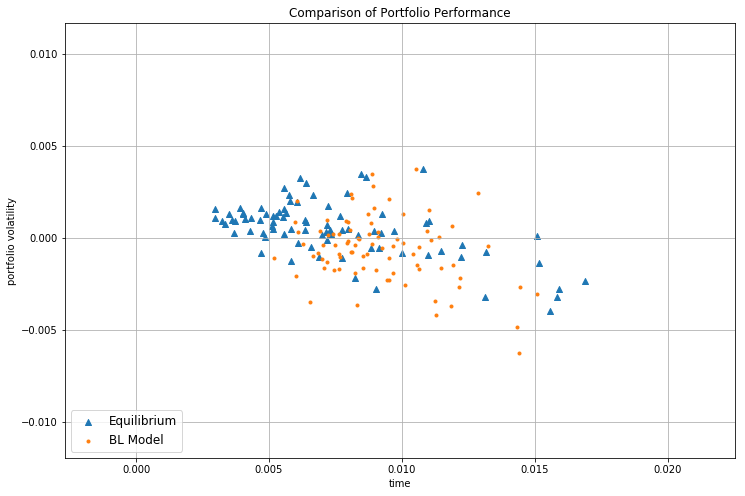

In [43]:
plt.figure(figsize=(12,8))

plt.scatter(comparison_vol["Equilibrium"], comparison_ret["Equilibrium"], label="Equilibrium",marker='^')
plt.scatter(comparison_vol["BL Model"], comparison_ret["BL Model"], label="BL Model",marker='.')

plt.grid(True)
plt.legend(loc='lower left', fontsize=12)
plt.xlabel('time')
plt.ylabel('portfolio volatility')
plt.title('Comparison of Portfolio Performance')